# Direct Marketing Campaigns for Bank Term Deposits

## Introduction

This dataset, titled Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.

## About this dataset

The dataset contains various features that provide insights into customer attributes and campaign outcomes. These features include:
*	Age: The age of the customer.
*	Job: The occupation of the customer.
*	Marital Status: The marital status of the customer.
*	Education: The education level of the customer.
*	Default: Whether or not the customer has credit in default.
*	Balance: The balance of the customer's account.
*	Housing Loan: Whether or not the customer has a housing loan.
*	Contact Communication Type: The method used to contact the customer (e.g., telephone, cellular).
*	Day: The day of the month when the last contact with the customers was made.
*	Duration: The duration (in seconds) of the last contact with customers during a campaign.
*	Campaign Contacts Count: Number of contacts performed during this campaign for each customer
```
        - pdays : number days passed since previously contacted form previous campaign
         - poutcome : outcome from previous marketing campaign
```      
The purpose behind this dataset is to visualize how customers subscribe to a term deposit based on these various features. By analyzing historical data on successful and unsuccessful subscription outcomes, patterns can be identified which can help predict future subscription behavior.

By utilizing this dataset and applying data visualization techniques, businesses in similar domains can better understand their target audience and optimize their marketing efforts towards potential subscribers who are more likely to respond positively to these campaigns


## The Task: Explore the Direct Marketing Campaigns datasets with Pandas

![image photo of a bank](images/Bank.jpeg)

Image by <a href="https://risingnepaldaily.com/storage/media/5875/bank.jpg">Nabil</a>


### Data Understanding

Each record (row) in this dataset represents a customer.

Each feature (column) in this dataset is some attribute of that customer. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 12 columns in total.

We are going to focus on the following features:

**Age**: `Numerical values between 19 and 90`

**Job**: `Managenent, blue-collar, other`

**Marital** : `married, single, other`

**Education**: `secondary, tertiary, other`

**Balance**: `Numerical values `

**Housing**: `Categorical data true, false`

**Loan**: `Categorical data true, false`


## 1. Loading the Datasets with Pandas

Importing Libraries such as:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [2]:
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using pandas to open the files located at `data/bank_main_file.csv`and `data/bank_sub_file.csv` 

In [3]:
df1=pd.read_csv('data/bank_main_file.csv')
df2=pd.read_csv('data/bank_sub_file.csv')

The following code checks that you loaded the data correctly:

In [4]:
# checking whether the data is loaded correctly

# Check that df is a dataframe
assert type(df1) == pd.DataFrame
assert type(df2) == pd.DataFrame
# Check that there are the correct number of rows
assert df1.shape[0] == 4521
assert df2.shape[0] == 11162
# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df1.shape[1] == 17
assert df2.shape[1] == 17

Inspect the contents of the dataframe:

In [5]:
print(f'df1 shape: {df1.shape}')
print(f'df2 shape:{df2.shape}')

df1 shape: (4521, 17)
df2 shape:(11162, 17)


df1 contains 4521 rows and 16 columns while df2 contains 11162 rows and 16 columns

In [6]:
# dataframe d1 information summary
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  deposit    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Information output shows that in the df1 dataset, all the 4521 row contains data in every column i.e there is no missing value.

In [7]:
# dataframe d2 information summary
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Information output shows that in the df2 dataset, all the 11162 row contains data in every column i.e there are no missing value.

## 2. Combining the dataframes

Combining the dataframe df1 with df2 using the `outer` join

In [8]:
df3 = df1.merge(df2, how="outer")
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14578,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
14579,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
14580,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
14581,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no


In [9]:
# combined dataframe information summary
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14583 entries, 0 to 14582
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        14583 non-null  int64 
 1   job        14583 non-null  object
 2   marital    14583 non-null  object
 3   education  14583 non-null  object
 4   default    14583 non-null  object
 5   balance    14583 non-null  int64 
 6   housing    14583 non-null  object
 7   loan       14583 non-null  object
 8   contact    14583 non-null  object
 9   day        14583 non-null  int64 
 10  month      14583 non-null  object
 11  duration   14583 non-null  int64 
 12  campaign   14583 non-null  int64 
 13  pdays      14583 non-null  int64 
 14  previous   14583 non-null  int64 
 15  poutcome   14583 non-null  object
 16  deposit    14583 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.0+ MB


## 3. Explore Data Distributions

Write code to produce histograms showing the distributions of `Age`,`Job`, `marital`, `education`, `balance`, `housing`, `loan` e.t.c.


### (a) Age
The `age` of the customer.

In [10]:
# age statistica analysis
df3['age'].describe()

count    14583.000000
mean        41.196256
std         11.550704
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

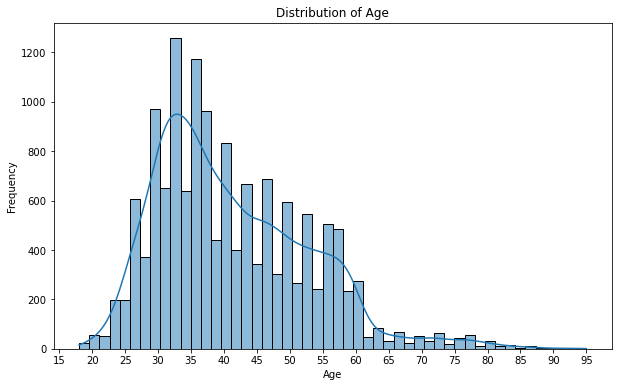

In [11]:
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(df3['age'], bins=50, kde=True, palette='viridis')

# Add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

From the Histogram above, Majority of customers were of the age between 30 years and 58 years
The most prevalent age range is [30 - 47]

### (b) Job

The occupation/`employment` status of the customer.

In [12]:
df3['job'] = df3['job'].replace('unknown', 'others')
df3['job'].value_counts()

management       3274
blue-collar      2704
technician       2406
admin.           1688
services         1242
retired           932
self-employed     543
entrepreneur      462
unemployed        460
student           416
housemaid         358
others             98
Name: job, dtype: int64

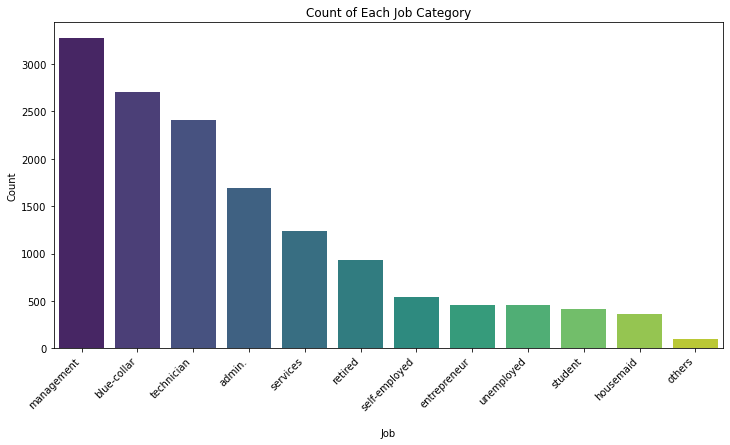

In [13]:
job_counts = df3['job'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('\nJob')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

From the Histogram above, Majority of customers were in management job category, followed by blue-collar and technicians.

### (c) Marital status

The `marital` status of the customer.

In [14]:
df3['marital'].value_counts()

married     8508
single      4383
divorced    1692
Name: marital, dtype: int64

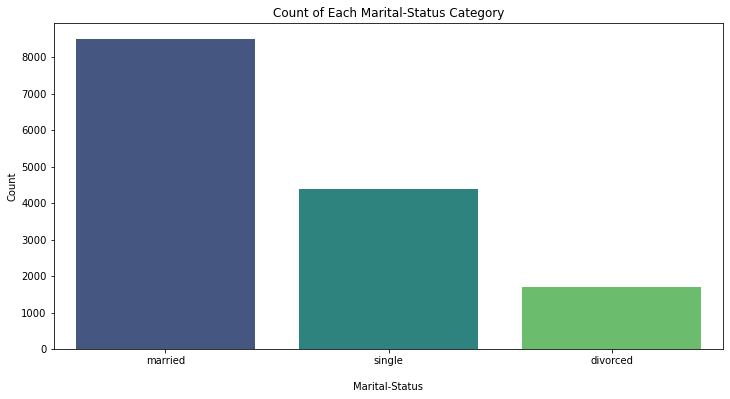

In [15]:
# Define counts
marital_counts = df3['marital'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

From the Histogram above, Majority of customers were married

### (d) Education Level of customers

The `education` level attained by the customer.

In [16]:
df3['education'] = df3['education'].replace('unknown', 'others')
df3['education'].value_counts()

secondary    7257
tertiary     4673
primary      2014
others        639
Name: education, dtype: int64

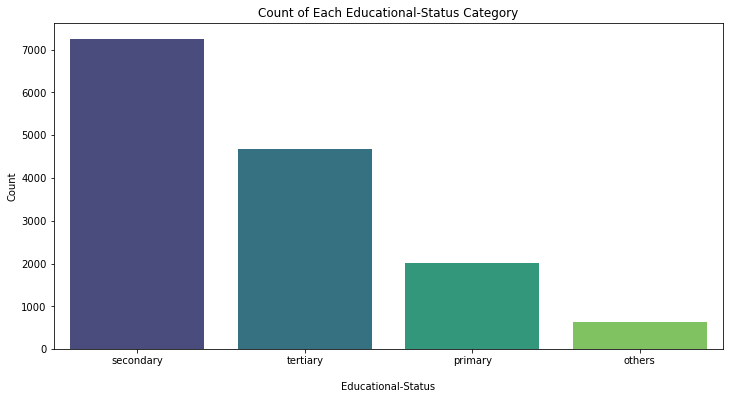

In [17]:
# Define Counts
education_counts = df3['education'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Educational-Status Category')
plt.xlabel('\nEducational-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

From the Histogram above, Majority of customers had attained the secondary level education followed with tertiary level.

### (e) Credit in Default Feature

Whether the customer has credit in default or not.

In [18]:
df3['default'].value_counts()

no     14358
yes      225
Name: default, dtype: int64

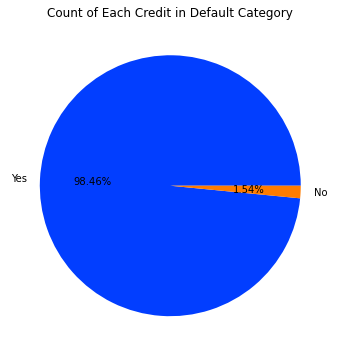

In [19]:
# Define counts
default_counts = df3['default'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot pie chart

plt.pie(default_counts,labels=['Yes', 'No'],colors=sns.color_palette('bright'), autopct='%.2f%%')

# Add title
plt.title('Count of Each Credit in Default Category')

# Show the plot
plt.show()

since the "no" values is very poor, the default column may not be useful thus it can be ignored.

### (f) Bank balances of customers

The balance in the customer's account.

In [20]:
df3['balance'].describe()

count    14583.000000
mean      1496.438936
std       3205.716818
min      -6847.000000
25%        105.000000
50%        514.000000
75%       1625.000000
max      81204.000000
Name: balance, dtype: float64

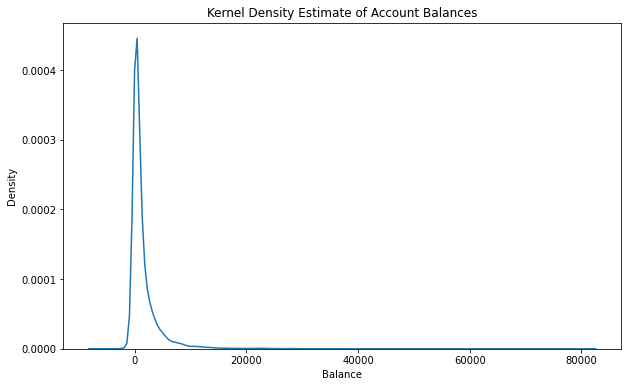

In [21]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(df3['balance'], palette='viridis')

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

In [22]:
# Check for values under zero
df3[df3['balance'] <= 0]['balance'].count()

2033

Dealing with outliers in the balance column.

In [23]:
# Define the percentile threshold for outliers - 95%
# Define the percentile threshold
percentile_threshold = 95

# Calculate the specified percentile
percentile_value = int(np.percentile(df3['balance'], percentile_threshold))

# Identify potential outliers
outliers = df3[df3['balance'] > percentile_value]

print(f'{percentile_threshold}th Percentile Value: {percentile_value}')
print(f'Number of Potential Outliers: {len(outliers)}')

95th Percentile Value: 6027
Number of Potential Outliers: 729


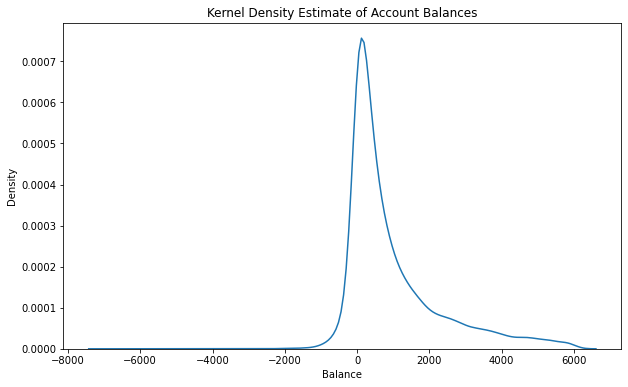

In [24]:
# dropping the values that are above 6027.
df = df3[df3['balance'] <= 6027]

# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(df['balance'], palette='viridis')

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

In [25]:
# Define the percentile threshold lower qurtile
percentile_threshold = 5

# Calculate the specified percentile
percentile_value = int(np.percentile(df['balance'], percentile_threshold))

# Identify potential outliers
outliers = df[df['balance'] < percentile_value]

print(f'{percentile_threshold}th Percentile Value: {percentile_value}')
print(f'Number of Potential Outliers: {len(outliers)}')

5th Percentile Value: -107
Number of Potential Outliers: 693


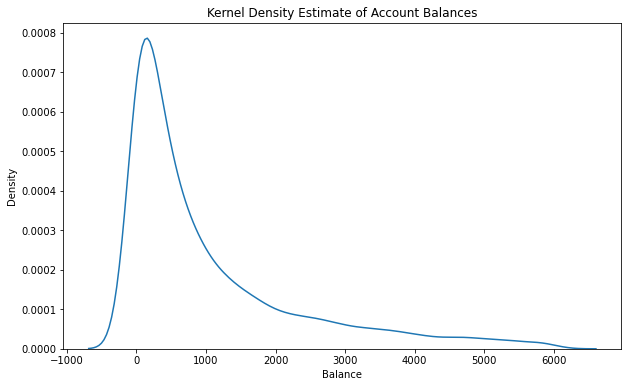

In [26]:
# removing outliers lower than -107
df = df[df['balance'] > -107]

# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(df['balance'], palette='viridis')

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

c:\Users\Murage J\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


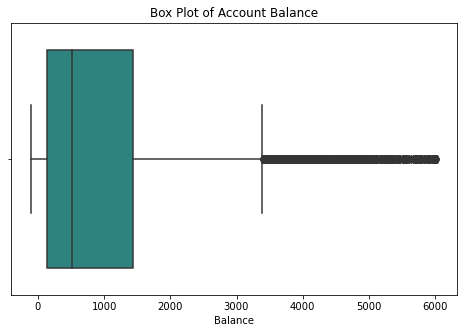

In [27]:
# Define figure size
plt.figure(figsize=(8, 5))

# Plot the boxplot
sns.boxplot(df['balance'], palette='viridis')

# Add labels and title
plt.title('Box Plot of Account Balance')
plt.xlabel('Balance')

# Show the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [28]:
mean=sts.mean(df3['balance'])
median=sts.median(df3['balance'])
Std=df3['balance'].std()
print(f"The mean :  {mean} \nThe Median: {median} \nStandard deviation : {Std}")

The mean :  1496.4389357471027 
The Median: 514 
Standard deviation : 3205.7168182764376


Interpretion of the above information.

In [29]:
"""
The customers have a average account balance of 1496.43 
the distribution has a median of 514 and a standard deviation of 3205.71
"""

'\nThe customers have a average account balance of 1496.43 \nthe distribution has a median of 514 and a standard deviation of 3205.71\n'

### (g) Housing Loan Feature

Whether the customer has a housing loan or not.

In [30]:
df3['housing'].value_counts()

yes    7305
no     7278
Name: housing, dtype: int64

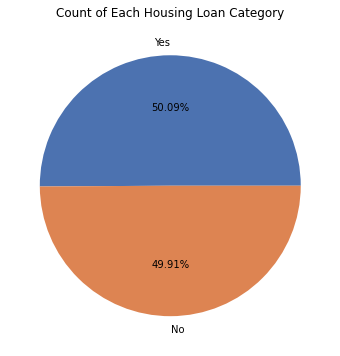

In [31]:
# Define counts
housing_counts = df3['housing'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot pie chart

plt.pie(housing_counts,labels=['Yes', 'No'],colors=sns.color_palette('deep'), autopct='%.2f%%')

# Add title
plt.title('Count of Each Housing Loan Category')

# Show the plot
plt.show()

### (h) Loan Feature

Whether the customer has a loan or not.

In [32]:
df['loan'].value_counts()

no     11405
yes     1755
Name: loan, dtype: int64

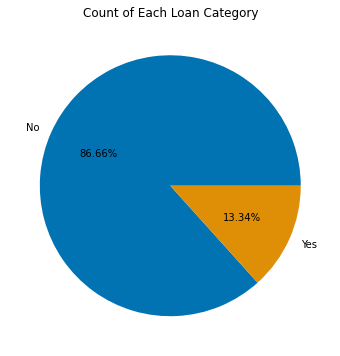

In [33]:
# Define counts
loan_counts = df['loan'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
plt.pie(loan_counts,labels=['No', 'Yes'],colors=sns.color_palette('colorblind'), autopct='%.2f%%')
# Add title
plt.title('Count of Each Loan Category')

# Show the plot
plt.show()

### (i) Contact Feature

Type of communication used to contact customers

In [34]:
df['contact'] = df['contact'].replace('unknown', 'others')
df['contact'].value_counts()

cellular     9224
others       3038
telephone     898
Name: contact, dtype: int64

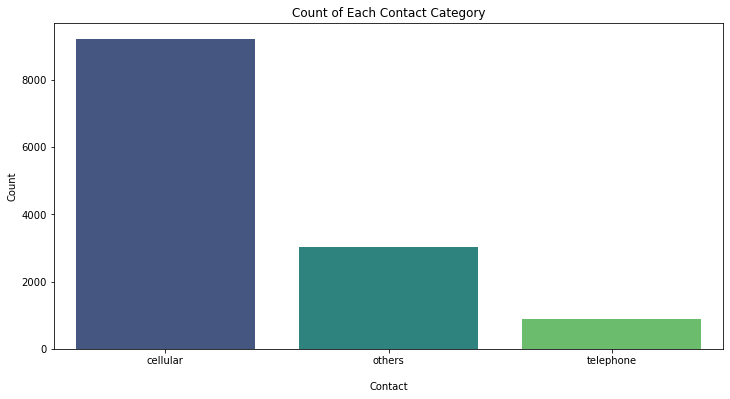

In [35]:
# Define counts
contact_counts = df['contact'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=contact_counts.index, y=contact_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Contact Category')
plt.xlabel('\nContact')
plt.ylabel('Count')

# Show the plot
plt.show()

In the cell below, interpret the above information.

### (j) Day and month Feature 

Day and month when customers were last contacted

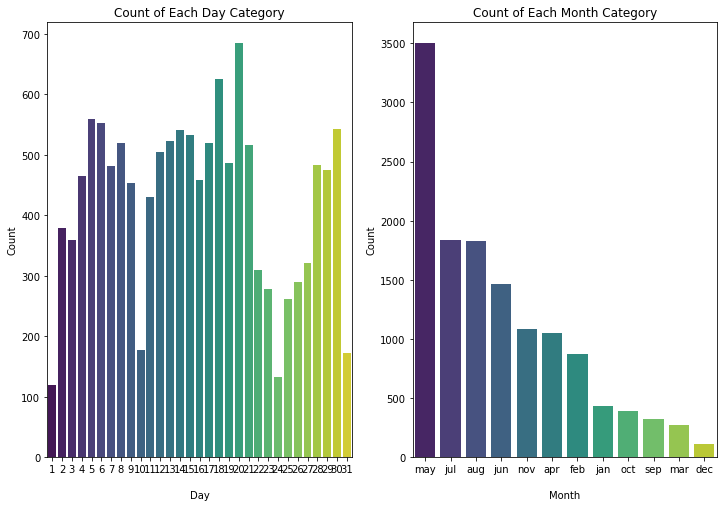

In [36]:
# Define counts
day_counts = df['day'].value_counts()
month_counts = df['month'].value_counts()
# Define figure size
plt.figure(figsize=(12, 8))

# Plot bar chart for day
plt.subplot(1,2,1)
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Day Category')
plt.xlabel('\nDay' )
# plt.xticks(rotation=90)
plt.ylabel('Count')

# Plot bar chart
plt.subplot(1,2,2)
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')

# Add labels and title for month
plt.title('Count of Each Month Category')
plt.xlabel('\nMonth')
plt.ylabel('Count')

# Show the plot
plt.show()

### (k) Campaign Feature 

Number of contacts performed during this campaign and for this client

In [37]:
df['campaign'].describe()

count    13160.000000
mean         2.586398
std          2.833417
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         50.000000
Name: campaign, dtype: float64

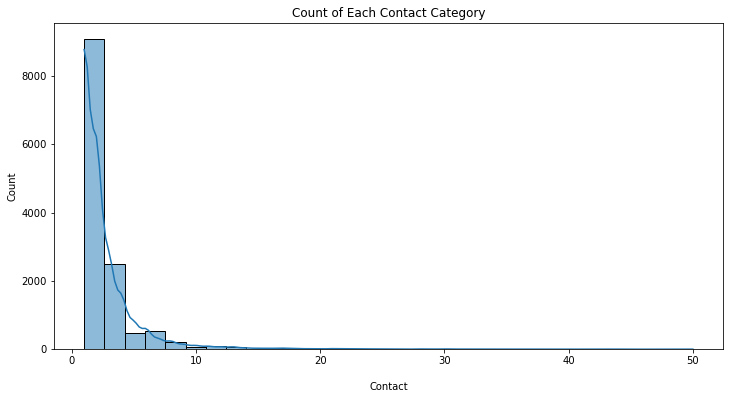

In [38]:
# Define counts
campaign_counts = df['campaign'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot histogram chart
sns.histplot(df['campaign'], bins=30, kde=True, palette='viridis')

# Add labels and title
plt.title('Count of Each Contact Category')
plt.xlabel('\nContact')
plt.ylabel('Count')

# Show the plot
plt.show()

### (k) Campaign Feature 

Number of contacts performed during this campaign and for this client

In [39]:
# Get the values that doesn't include -1
filtered_data = df[df['pdays'] != -1]

# Get statistical summary
filtered_data['pdays'].describe()

count    3091.000000
mean      208.949854
std       122.201347
min         1.000000
25%       102.000000
50%       183.000000
75%       296.500000
max       871.000000
Name: pdays, dtype: float64

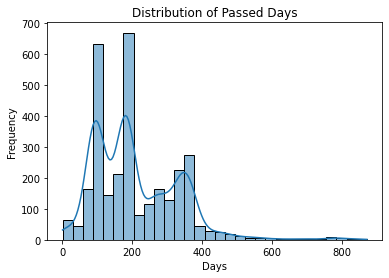

In [40]:
# Plot the histogram
ax = sns.histplot(filtered_data['pdays'], bins=30, kde=True, palette='viridis')

# Add labels and title
plt.title('Distribution of Passed Days')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### (l) Target field 

Has the client subscribed a term deposit?

In [41]:
df['deposit'].value_counts()

no     8331
yes    4829
Name: deposit, dtype: int64

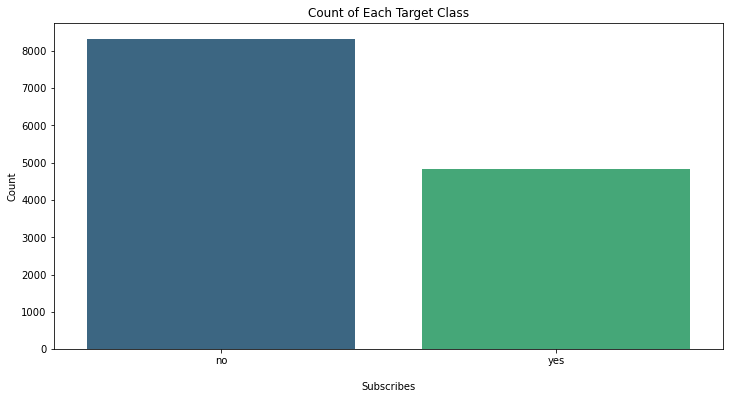

In [42]:
# Define counts
target_counts = df['deposit'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Target Class')
plt.xlabel('\nSubscribes')
plt.ylabel('Count')

# Show the plot
plt.show()

Converting the categorical data to numerical data.

In [43]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

df = df.apply(LabelEncoder().fit_transform)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,12,11,1,1,0,1740,0,0,0,18,10,77,0,0,0,3,0
1,15,8,1,2,0,3105,1,1,0,10,8,218,0,317,4,0,0
2,17,4,2,3,0,1398,1,0,0,15,0,183,0,308,1,0,0
3,12,4,1,3,0,1501,1,1,1,2,6,197,3,0,0,3,0
4,41,1,1,2,0,97,1,0,1,4,8,224,0,0,0,3,0


## 4. Explore Correlations

To understand more about what features of these dataset to higher deposit, we look at some correlations.

In the cell below, we print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `depoit` (other than `deposit`, which is perfectly correlated with itself).
using a heat map to show the correlation

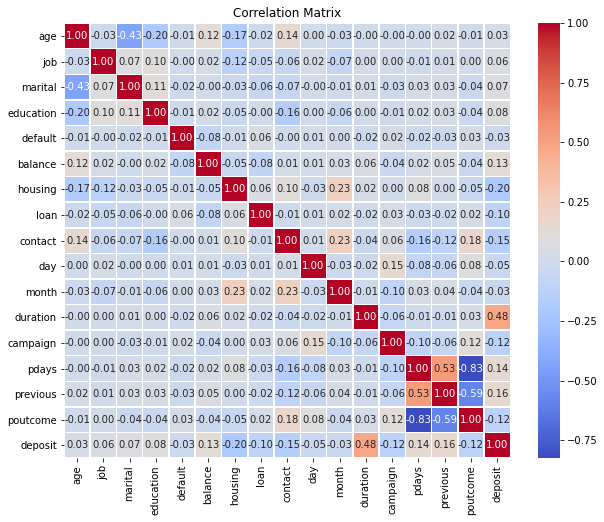

In [44]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Now, find the ***most positively correlated*** column:

In [52]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_data = df[numeric_columns]

# correlations = numeric_data.corr()

correlation_data = numeric_data.corr()
strongest_pos_corr_deposit = correlation_data['deposit'].sort_values(ascending=False).head()

print('Strongest +ve Corr:')
print(strongest_pos_corr_deposit)


Strongest +ve Corr:
deposit     1.000000
duration    0.480934
previous    0.157287
pdays       0.143235
balance     0.127208
Name: deposit, dtype: float64


Now, find the ***most negatively correlated*** column:

In [53]:
strongest_corr_neg_deposit = correlation_data['deposit'].sort_values(ascending=True).head()
print(strongest_corr_neg_deposit)

housing    -0.202405
contact    -0.153109
campaign   -0.122950
poutcome   -0.118487
loan       -0.103877
Name: deposit, dtype: float64


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

KeyError: 'OverallCond'

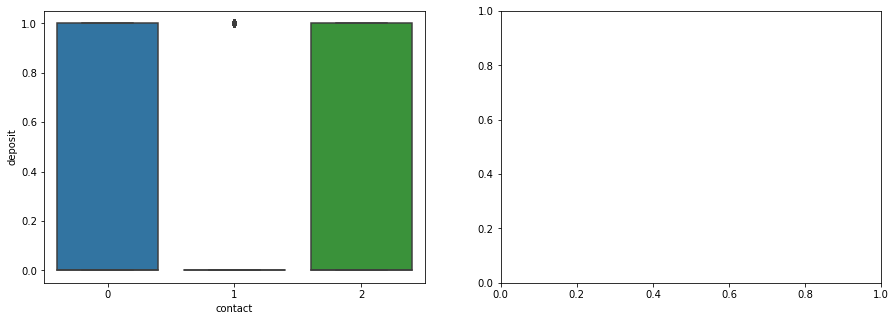

In [54]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["duration"],
    y=df["deposit"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["contact"],
    y=df["deposit"],
    ax=ax2
)

# Customize labels
ax1.set_title(None)
ax1.set_xlabel(None)
ax1.set_ylabel("Sale Price")
ax2.set_title(None)
ax2.set_xlabel(None)
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
None
"""

'\nNone\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [ ]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

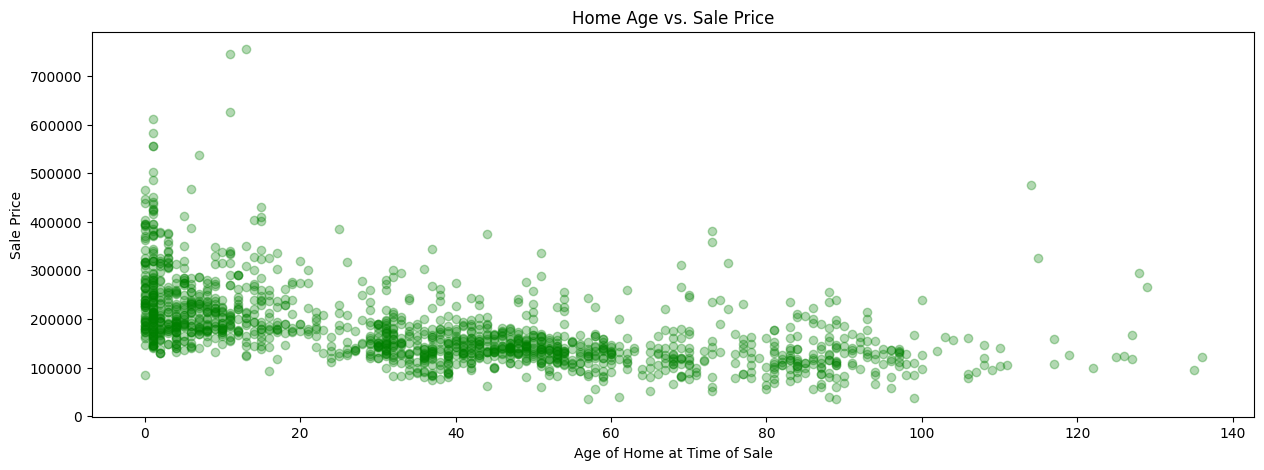

In [ ]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
None
"""

'\nNone\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.